# Analytical solution for WF model 1 segment and 2 segment viruses without competition

In [166]:
import numpy as np
from scipy.stats import poisson
from scipy.special import comb as C
import matplotlib.pyplot as plt
# common parameters
s = 0.05 # selection coefficient
mu = 0.0008 * 300 # mu is mutation rate for genome, (usual mu*L in comp1.2 or comp1.3)
gennum = 1000
kl = 100 # number of k's to track
# roundto = 3 # round the proportion to this number
nopick = 10 # number of steps to convergence when calculating proportion


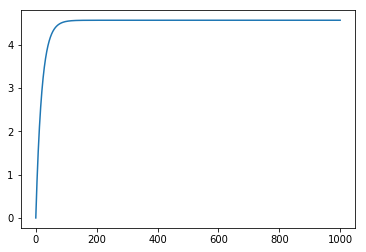

In [167]:
# 1 segment model
#s = 0.05 # selection coefficient
#mu = 0.0010 * 300 # mu is mutation rate for genome, (usual mu*L in comp1.2 or comp1.3)
#gennum = 1000
#kl = 100 # number of k's to track
#roundto = 3 # round the proportion to this number
#nopick = 10 # number of steps to convergence when calculating proportion
krecord = [] # record of k.
#initialize
k = 0 # mean k
krecord.append(k)
p = list(np.zeros(kl)) # proportions of individual with certain k value. p[1] = proportion of k=1's.
p[0] = 1.0

# go through generations
for i in range(gennum): # per generation
    k += mu
    for index in range(kl):
        p[index] = poisson.pmf(index,k)
        # p[index] = np.round(poisson.pmf(index,k),roundto)
    #if np.sum(p) > 1:
    #    p[np.where(p==np.max(p))[0][0]] -= np.sum(p) - 1
    #elif np.sum(p) < 1:
    #    p[np.where(p==np.max(p))[0][0]] += 1 - np.sum(p)
    #print(p)
    #print(np.sum(p))
    #print(k)
    R_factor = 0
    for l in range(len(p)):
        R_factor += p[l]*(1-s)**l
    next_k = 0 # mean k of next generation
    for j in range(len(p)): # get the next proportion of k=x's.
        R = 0
        prob = 0
        for k in range(nopick):
            prob += (1-R)*p[j]*(1-s)**j
            R += (1 - R)*R_factor
        next_k += prob*j
    k = next_k
    krecord.append(k)

%matplotlib inline
plt.plot(krecord)
plt.show()

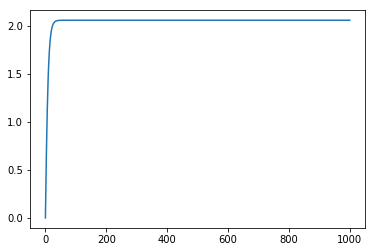

In [168]:
# 2 segment model
#s = 0.05 # selection coefficient
#mu = 0.0010 * 300 # mu is mutation rate for genome, (usual mu*L in comp1.2 or comp1.3)
#gennum = 1000
#kl = 100 # number of k's to track
# roundto = 3 # round the proportion to this number
#nopick = 10 # number of steps to convergence when calculating proportion
krecord2seg = [] # record of k.
krecord1 = []
krecord2 = []
#initialize
p1 = list(np.zeros(kl)) # proportions of individual with certain k value. p[1] = proportion of k=1's.
p2 = list(np.zeros(kl))
p1[0] = 1.0
p2[0] = 1.0
k1 = 0 # mean k1 and k2
k2 = 0
k = 0 # mean k
krecord2seg.append(k)
krecord1.append(k1)
krecord2.append(k2)

# go through generations
for i in range(gennum): # per generation
    k1 += mu/2
    k2 += mu/2
    for index in range(kl):
        p1[index] = poisson.pmf(index,k1)
        p2[index] = poisson.pmf(index,k2)
    #if np.sum(p1) > 1:
    #    p1[np.where(p1==np.max(p1))[0][0]] -= np.sum(p1) - 1
    #elif np.sum(p1) < 1:
    #    p1[np.where(p1==np.tmax(p1))[0][0]] += 1 - np.sum(p1)
    #if np.sum(p2) > 1:
    #    p2[np.where(p2==np.max(p2))[0][0]] -= np.sum(p2) - 1
    #elif np.sum(p) < 1:
    #    p2[np.where(p2==np.max(p2))[0][0]] += 1 - np.sum(p2)
    R_factor1 = 0
    R_factor2 = 0
    for l in range(len(p1)):
        R_factor1 += p1[l]*(1 - s)**l
        R_factor2 += p2[l]*(1 - s)**l
    next_k1 = 0 # mean k1 and k2 of next generation
    next_k2 = 0
    for j in range(len(p1)): # get the next proportion of k=x's.
        R1 = 0
        R2 = 0
        prob1 = 0
        prob2 = 0
        m1 = np.floor(N*p1[j])
        m2 = np.floor(N*p2[j])
        for k in range(nopick):
            prob1 += (1 - R1)*p1[j]*(1 - s)**(j + k2)
            prob2 += (1 - R2)*p2[j]*(1 - s)**(j + k1)
            R1 += (1 - R1)*R_factor1
            R2 += (1 - R2)*R_factor2
        next_k1 += prob1*j
        next_k2 += prob2*j
    k1 = next_k1
    k2 = next_k2
    k = k1 + k2
    krecord1.append(k1)
    krecord2.append(k2)
    krecord2seg.append(k)
% matplotlib inline
plt.plot(krecord2seg)
plt.show()

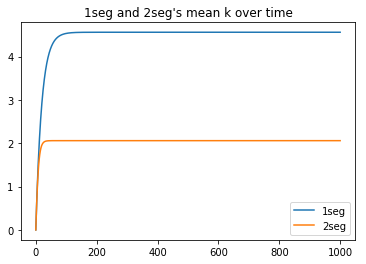

4.559982161593681
4.8


In [170]:
plt.plot(krecord,label='1seg')
plt.plot(krecord2seg,label='2seg')
plt.title('1seg and 2seg\'s mean k over time')
plt.legend()
plt.show()
print(krecord[-8])
print(mu/s)

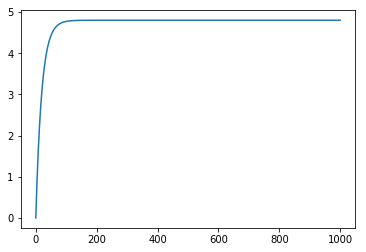

In [172]:
# using kt+1 = kt(1-s) + mu

s = 0.05
krecord = [] # for 1seg
krecord2 = [] # for 2seg
k = 0 # 1segment mean k

k1 = 0 # 1st segment mean k
k2 = 0 # 2nd segment mean k
k2seg = 0

krecord.append(k)
krecord2.append(k2seg)
genum = 1000
for i in range(genum):
    k = k*(1-s) + mu
    krecord.append(k)
    k1 = k1*(1-s) + mu/2
    k2 = k2*(1-s) + mu/2
    k2seg = k1 + k2
    krecord2.append(k2seg)
    
    
    
plt.plot(krecord)
#plt.plot(krecord2)
plt.show()

